# Problema del vendedor con 3 vehículos
Dada una lista de ciudades y las distancias entre cada par de ciudades, encuentre el camino más corto posible que pase por todas las ciudades con 3 vehículos
## Módulos requeridos para nuestra evolución.
- `deap`
- `random`
- `numpy`
- `matplotlib`
- `seaborn`

## Módulos creados
- `tsp` ver http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/index.html
- `vrp`

In [1]:
from deap import base
from deap import creator
from deap import tools

import random
import array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import vrp
import elitism

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the desired vehicle routing problem using a traveling salesman problem instance:
TSP_NAME = "bayg29"
NUM_OF_VEHICLES = 3
DEPOT_LOCATION = 12
vrp = vrp.VehicleRoutingProblem(TSP_NAME, NUM_OF_VEHICLES, DEPOT_LOCATION)

# Genetic Algorithm constants:
POPULATION_SIZE = 500
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.2   # probability for mutating an individual
MAX_GENERATIONS = 1000
HALL_OF_FAME_SIZE = 30

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(vrp)), len(vrp))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

## Evaluación de la Función

In [2]:
# fitness calculation - compute the max distance that the vehicles covered
# for the given list of cities represented by indices:
def vrpDistance(individual):
    return vrp.getMaxDistance(individual),  # return a tuple

## Operadores Genéticos

In [3]:
toolbox.register("evaluate", vrpDistance)

# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(vrp))
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2.0/len(vrp))


## Evolución de la población

In [4]:
# Genetic Algorithm flow:
def main():
    import numpy as np
    import matplotlib.pyplot as plt
    
    # create initial population (generation 0):
    pop = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    pop, logbook = elitism.eaSimpleWithElitism(pop, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    return pop, logbook, hof
    

gen	nevals	min    	avg    
0  	500   	8732.15	16903.6
1  	437   	8732.15	14680.1
2  	437   	8445.67	13151.6
3  	429   	7249.19	12458.5
4  	447   	7249.19	11984.6
5  	417   	7249.19	11329.2
6  	426   	7249.19	11156  
7  	437   	7249.19	10676.3
8  	421   	7249.19	10421.8
9  	446   	7249.19	9873.39
10 	424   	7059.04	9647.56
11 	421   	6409.66	9133.03
12 	447   	6409.66	9152.62
13 	432   	6409.66	9017.36
14 	437   	6409.66	9073.68
15 	420   	6409.66	8825.44
16 	427   	6347.89	8674.57
17 	433   	6347.89	8622.92
18 	435   	6217.87	8609.6 
19 	436   	6217.87	8573.16
20 	436   	6217.87	8592.75
21 	434   	6217.87	8328.55
22 	434   	6112.11	8209.46
23 	430   	6093.48	7891   
24 	432   	5995.94	7543.89
25 	439   	5866.95	7190.49
26 	420   	5837.97	6951.21
27 	433   	5837.97	6696.05
28 	449   	5598.72	6593.52
29 	424   	5598.72	6449.88
30 	433   	5598.72	6412.2 
31 	431   	5598.72	6246.35
32 	434   	5598.72	6259.06
33 	425   	5598.72	6180.36
34 	428   	5431.48	6111.86
35 	429   	5431.48	6096.18
3

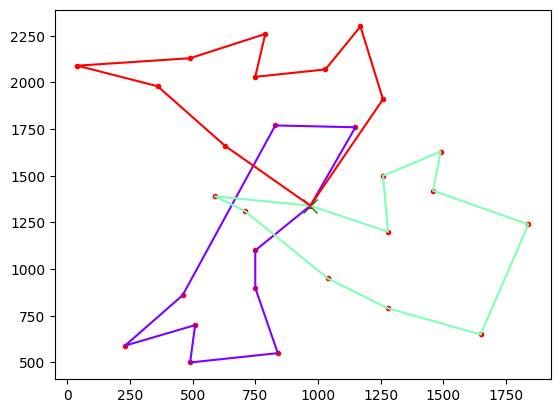

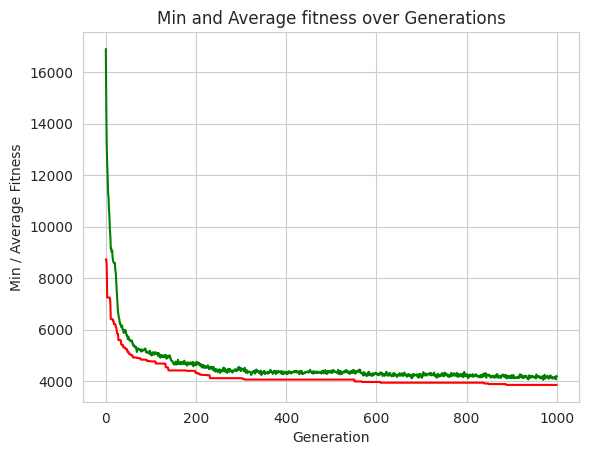

In [5]:
if __name__ == "__main__":
    pop, log, hof = main()
    
# print best individual info:
    best = hof.items[0]
    print("-- Best Ever Individual = ", best)
    print("-- Best Ever Fitness = ", best.fitness.values[0])

    print("-- Route Breakdown = ", vrp.getRoutes(best))
    print("-- total distance = ", vrp.getTotalDistance(best))
    print("-- max distance = ", vrp.getMaxDistance(best))

    # plot best solution:
    plt.figure(1)
    vrp.plotData(best)

    # plot statistics:
    minFitnessValues, meanFitnessValues = log.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    # show both plots:
    plt.show()
